

Dataset : Kelenjar Getah Bening

Data set ini berupakan data set kelenjar getah bening , dataset ini merupakan data set yang masih rusak sehingga perlu diperbaiki untuk agar menjadi data set yang benar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn
import statistics
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import norm
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Load data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/YohanWijaya10/Data-Mining-week-9/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


Dalam data set ini terdapat 8 Colummn dan 90 Row 


Gender: Jenis kelamin

Age: Umur

Time: Waktu perawatan

Number of Warts: Jumlah benjolan

Type: Tipe benjolan

Area: Luas benjolan

Induration Diameter: Diameter benjolan

Result of Treatment: Hasil perawatan

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [4]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

# Mengcheck Imbalance

C:\Users\Yohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Result_of_Treatment', ylabel='count'>

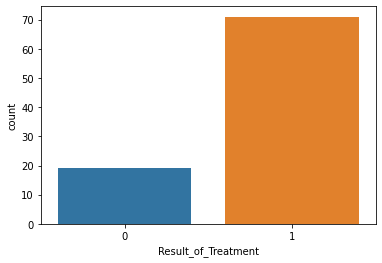

In [5]:
import seaborn as sns
sns.countplot(df['Result_of_Treatment'])

Disini kita melihat imbalance dari target yaitu result_of_Treatment

# Disini kita lihat dari heatmap yang korelasinya paling baik adalah Type dan Time

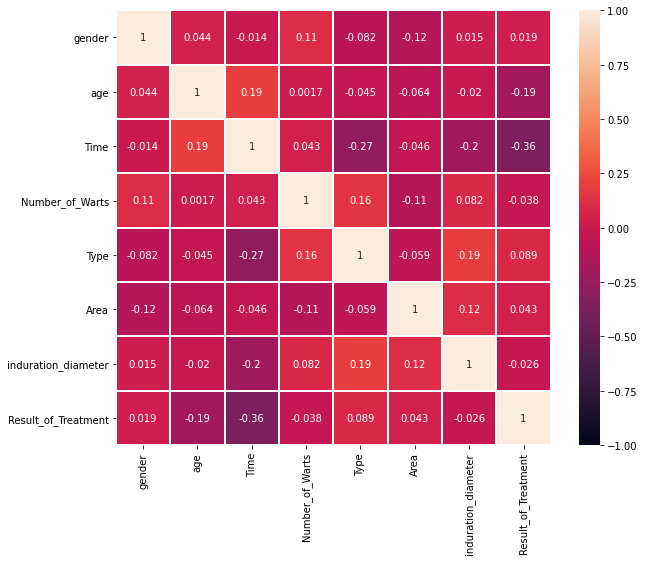

In [6]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidths=0.1, square = True)
plt.show()

# Drop value yang null

In [7]:
dfnew = df.dropna()

# Time

### Melakukan Regresi Dengan menggunakan Linear Regression

In [8]:
from sklearn.model_selection import train_test_split as traintest

x = dfnew[['Area', 'induration_diameter', 'age']]
y = dfnew['Time']
X_train, X_test, y_train, y_test = traintest(x, y, test_size = 0.1 , random_state =  47)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(X_test)


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-Squared:", r2)


Mean Squared Error: 6.37055633853445
Mean Absolute Error: 1.8696841422018737
R-Squared: 8.435152371599752e-05


In [12]:
df[df['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [13]:
nulltime = df["Time"].isna()
var_nulltime = pd.DataFrame(df[['Area', 'induration_diameter', 'age']][nulltime])
time_pred = np.round(lr.predict(var_nulltime), 2)
missingval = df['Time'].isna()
df.loc[missingval,'Time'] = time_pred

In [14]:
df.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,6.58,8.0,2.0,56,45.0,1
50,1,54,8.84,13.0,3.0,43,5.0,1
72,2,28,7.52,4.0,1.0,9,2.0,1


In [15]:
from sklearn.model_selection import train_test_split as traintest

x = dfnew[['Number_of_Warts', 'induration_diameter']]
y = dfnew['Type']
X_train, X_test, y_train, y_test = traintest(x, y, test_size = 0.1, random_state = 27)

# Type

### Melakukan Klasifikasi dengan menggunakan Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print(y_pred)

Confusion Matrix
 [[6 0 1]
 [0 1 0]
 [0 0 0]]
Accuracy Score:  0.875
[1. 1. 1. 2. 3. 1. 1. 1.]


In [18]:
df[df['Type'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,NaN,50,9.0,0
26,1,20,8.00,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [19]:
nulltype = df["Type"].isna()
var_typenull = pd.DataFrame(df[['induration_diameter', 'Number_of_Warts']][nulltype])
type_pred = np.floor(model.predict(var_typenull))
missingval = df['Type'].isna()
df.loc[missingval,'Type'] = type_pred

C:\Users\Yohan\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [20]:
df.iloc[[10,26,66, 86, 89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,1.0,50,9.0,0
26,1,20,8.00,6.0,1.0,45,8.0,1
66,2,23,6.75,6.0,1.0,19,2.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
89,2,53,7.25,6.0,1.0,81,7.0,1


# Melihat sisa column yang masin nan

In [21]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        1
Type                   0
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

# Mengisi data yang Null nan menggunakan mean

In [22]:
df['Number_of_Warts'] = df['Number_of_Warts'].fillna(np.floor(df['Number_of_Warts'].mean()))
df['induration_diameter'] =df['induration_diameter'].fillna(np.floor(df['induration_diameter'].mean()))
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

# Repair tipe dataset

In [23]:
df[['Number_of_Warts', 'Type', 'induration_diameter']] = df[['Number_of_Warts', 'Type', 'induration_diameter']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


In [24]:
X = df[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = df['Result_of_Treatment']
oversample = SMOTE(random_state = 0)
X_smote, y_smote = oversample.fit_resample(X, y)
df = pd.DataFrame(X_smote)
df["Result_of_Treatment"] = y_smote

<AxesSubplot: xlabel='Result_of_Treatment', ylabel='count'>

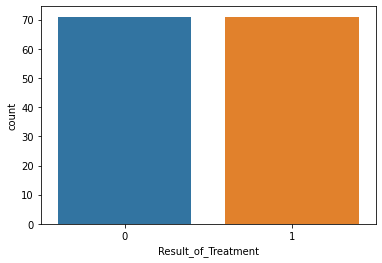

In [25]:
sns.countplot(x = df['Result_of_Treatment'])


# Regression 

### Melakukan regresi dengan data yang sudah Benar

In [26]:
df = df.rename(columns = {'gender' : 'gender','age' : 'age','Time':'time','Number_of_Warts':'number_of_warts','Type':'type','Area':'area','induration_diameter':'induration_diameter','Result_of_Treatment':'result_of_treatment'})


In [27]:
X = df[['area', 'induration_diameter', 'age']]
y = df['time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 4)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print("Score: ",lr.score(X_test, y_test))

Root Mean Squared Error (RMSE):  2.8904932450539516
MAPE:  39.20752269735403
Score:  0.10780735715530576


# Membandingkan Prediksi dan data aktualnya

In [28]:
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table

,y_test,y_pred
12,12.000000,8.127360
64,8.500000,7.274306
41,6.750000,8.279915
11,11.000000,7.725008
5,12.000000,8.413419
96,10.113641,8.941840
111,11.395562,8.482663
118,11.555188,7.695878
19,4.000000,6.875648
2,12.000000,7.527447


# Klasifikasi  


In [29]:


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0]
 [2 7]]
Accuracy Score:  0.8666666666666667


# Membandingkan prediksi klasifikasi dengan data Aktual

In [30]:
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
